# Arquitetura de Redes Neurais Long Short Term Memory (LSTM)

## Multivariate Time Series Forecasting Using LSTM, GRU & 1d CNNs


#
<br>

<br>
<br>



_preparação no terminal e no anaconda para trabalhar:_

no terminal do linux:

conda env list
#### conda environments:
<br>
base                  *  /home/fabiene/anaconda3

Maq2                     /home/fabiene/anaconda3/envs/Maq2

RBA_est                  /home/fabiene/anaconda3/envs/RBA_est

Robyn                    /home/fabiene/anaconda3/envs/Robyn

Udemy                    /home/fabiene/anaconda3/envs/Udemy

~$ conda create --name YouTube python=3.12


https://www.youtube.com/watch?v=c0k-YLQGKjY

In [104]:
#!pip install tensorflow
#!pip install pandas

In [105]:
# Bibliotecas de interesse
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [106]:
import zipfile

# Caminho do arquivo compactado
zip_path = 'jena_climate_2009_2016.csv.zip'

# Abrir o arquivo zip
with zipfile.ZipFile(zip_path, 'r') as z:
    # Listar os arquivos dentro do zip
    print(z.namelist())
    
    # Escolher o arquivo desejado
    csv_file = z.namelist()[0]  # Substitua o índice conforme necessário
    
    # Ler o CSV específico
    with z.open(csv_file) as f:
        df = pd.read_csv(f)

display(df.head())

['jena_climate_2009_2016.csv']


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [107]:
df2 = df[5::6]
df2

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


df2 = df[5::6] é usada com um objeto DataFrame do pandas, realiza uma seleção baseada em slicing (fatiamento) e significa:

5: Comece no índice 5 (sexto elemento, já que o índice é baseado em zero).

::6: Pule a cada 6 linhas a partir do índice inicial.
Portanto, essa operação seleciona todas as linhas do DataFrame df que estão nos índices 5, 11, 17, 23, e assim por diante.



# formatar as datas de interesse e mostrar as primeiras 26 horas, dados de 1 em 1 hora

In [108]:
df2.index = pd.to_datetime(df2['Date Time'], format='%d.%m.%Y %H:%M:%S')
df2[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


# analisar apenas os dados das temperaturas recentes

In [109]:
#!pip install matplotlib


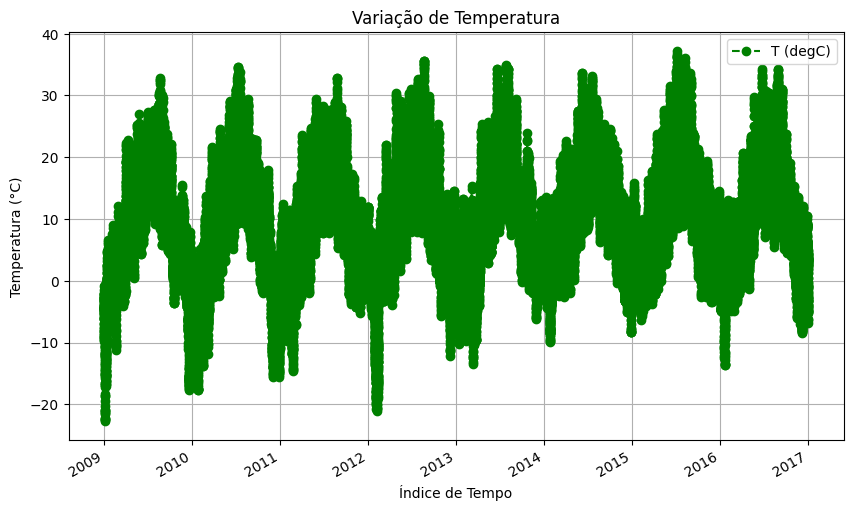

In [110]:
temp = df2['T (degC)']

import matplotlib.pyplot as plt


# Plotagem aprimorada
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
temp.plot(
    color="green",  # Cor da linha
    linestyle="--",  # Estilo da linha
    marker="o",  # Marcador nos pontos
    title="Variação de Temperatura",  # Título do gráfico
    xlabel="Índice de Tempo",  # Rótulo do eixo X
    ylabel="Temperatura (°C)",  # Rótulo do eixo Y
    grid=True,  # Adicionar grade
    legend=True  # Mostrar legenda
)
plt.show()


deep learning models, colocar em matriz 

últimos 5 dias, ou horas para ser previstos




In [111]:
# [[[1], [2], [3], [4], [5]]] horas => [6] a hora prevista exata

# quantidades de colunas na primeira linha da matrix, faremos 5 colunas

# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

#matriz dos dados e a última linha vertical é o vetor y

# criando matriz com 3 tensors



# função que introduz o novo dataframe (temp) e mais o tamanho da janela
# window_size: Tamanho da janela de observação para criar as amostras (padrão: 5).


def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  # Converter o DataFrame df em um array NumPy para facilitar operações "matriciais" e indexação.
  # armazenar em listas x e y
  X = [] 
  y = []
  #  Itera sobre os índices do array convertido (df_as_np) até o tamanho total menos o window_size. 
  # Isso garante que você não ultrapasse o limite do array ao criar janelas.
  for i in range(len(df_as_np)-window_size):
    #Cria uma janela de observação:
    #Seleciona window_size valores consecutivos começando no índice i (df_as_np[i:i+window_size]).
    #Cada valor é colocado em sua própria lista ([[a] for a in ...]) para ter a forma esperada de um tensor 3D.
    row = [[a] for a in df_as_np[i:i+window_size]]
    # Adiciona a janela criada (row) à lista X.
    X.append(row)
    # Pega o valor imediatamente após a janela atual (índice i+window_size) para ser usado como rótulo (label) correspondente.
    label = df_as_np[i+window_size]
    # alimenta na lista y
    y.append(label)
    #X: Contém janelas de observação no formato 3D (amostras, sequência, features).
    #y: Contém os valores rótulo correspondentes no formato 1D.
  return np.array(X), np.array(y)
  
  
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

#X1.shape: Formato do array de features (n_amostras, window_size, 1).
#y1.shape: Formato do array de rótulos (n_amostras,).

((70086, 5, 1), (70086,))

In [112]:
# exemplo novamente

# temp = [1, 2, 3, 4, 5, 6, 7, 8, 9] e WINDOW_SIZE = 3:

#X1 será:

matrix_modelo = """[
  [[1], [2], [3]],
  [[2], [3], [4]],
  [[3], [4], [5]],
  [[4], [5], [6]],
  [[5], [6], [7]],
  [[6], [7], [8]]
]"""
#y1 será:


#[4, 5, 6, 7, 8, 9]

In [113]:
X1

array([[[-8.05],
        [-8.88],
        [-8.81],
        [-9.05],
        [-9.63]],

       [[-8.88],
        [-8.81],
        [-9.05],
        [-9.63],
        [-9.67]],

       [[-8.81],
        [-9.05],
        [-9.63],
        [-9.67],
        [-9.17]],

       ...,

       [[ 2.44],
        [ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ]],

       [[ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75]],

       [[-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75],
        [-2.89]]])

In [114]:
y1

array([-9.67, -9.17, -8.1 , ..., -2.75, -2.89, -3.93])

# treinar, testar, validar e previsar

In [115]:
df2.shape

(70091, 15)

In [116]:
X1.shape, y1.shape


((70086, 5, 1), (70086,))

In [117]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [118]:
# para validação, calculo do erro MeanSquaredError

#Importa a classe Sequential, que é usada para empilhar camadas do modelo de forma linear, onde cada camada tem uma única entrada e saída.
from tensorflow.keras.models import Sequential

#Importa todas as camadas disponíveis no Keras, como InputLayer, LSTM, Dense, entre outras.
from tensorflow.keras.layers import *

#Importa o callback ModelCheckpoint, que permite salvar o modelo durante o treinamento, por exemplo, com base na menor perda de validação.
from tensorflow.keras.callbacks import ModelCheckpoint

# Importa a função de perda de erro médio quadrático (MSE), geralmente usada para problemas de regressão.
from tensorflow.keras.losses import MeanSquaredError

#Importa a métrica de erro quadrático médio (RMSE), que mede o quão próximo os valores previstos estão dos valores reais.
from tensorflow.keras.metrics import RootMeanSquaredError

#Importa o otimizador Adam, que combina as vantagens do SGD com momento e RMSProp. 
#Ele é amplamente utilizado por sua eficiência em muitos tipos de problemas.
from tensorflow.keras.optimizers import Adam



In [119]:
# modelo que usaremows, contendo 5 colunas da matriz e mais 1 vetor (no caso .add(InputLayer((5, 1)))


# O modelo é criado usando a classe Sequential, que permite empilhar camadas de forma simples e linear.
#- Criação do modelo
# Inicializa um modelo sequencial, onde as camadas serão adicionadas uma após a outra. 
model1 = Sequential()

# - Define a camada de entrada com forma (5, 1):
# 5: O tamanho da janela temporal (sequência de entrada).
# 1: O número de features em cada passo temporal.
model1.add(InputLayer((5, 1)))
#LSTM(64), secrets of lstm and the math behind it. 
#Complex recurrent neural network 

In [120]:
# Adiciona uma camada Long Short-Term Memory (LSTM) com 64 unidades. Camada LSTM
# LSTMs são usadas para modelar dados sequenciais, como séries temporais.
# Cada unidade LSTM tem memória interna que pode capturar dependências de longo prazo nas sequências.
model1.add(LSTM(64))

# Camada Dense  (com ativação ReLU)
# Adiciona uma camada densa totalmente conectada com:
# 8 unidades: Aprenderá padrões de alto nível após a saída da LSTM.
# Função de ativação 'relu': Mantém apenas valores positivos, o que ajuda a evitar problemas de gradientes (vanishing gradient).
model1.add(Dense(8, 'relu'))

# 5. Camada Dense (com ativação Linear)
# Adiciona uma camada densa com:
# 1 unidade: Produz a previsão final, geralmente um único valor em problemas de regressão.
# Ativação 'linear': A saída é contínua e não transformada, adequada para regressão.

model1.add(Dense(1, 'linear'))

In [121]:
model1.summary()
# Exibe a arquitetura do modelo, incluindo:
#Número de camadas.
#Forma da entrada e saída de cada camada.
#Número de parâmetros treináveis.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

Explicação dos Parâmetros
LSTM Layer:

Calcula parâmetros com a fórmula:

Params=4×((units+input_dim+1)×units)

Substituindo:

Params=4×((64+1)×64)=16,896

Dense Layers:

Dense(8): (64+1)×8=520

Dense(1): (8+1)×1=9



In [122]:
# cria um callback chamado ModelCheckpoint, que é usado para salvar o estado do modelo durante o treinamento.
# save_best_only=True:
# Indica que apenas os pesos do melhor modelo serão salvos, baseado no desempenho de validação.
# O "melhor" modelo é determinado pela métrica monitorada (como perda de validação ou outra métrica configurada). Por padrão, monitora a perda de validação (val_loss).



# **** loss=MeanSquaredError()
# Define a função de perda como Erro Médio Quadrático (MSE):
# Fórmula para MSE (Erro Médio Quadrático)
# MSE = (1/n) * Σ(y_i - ŷ_i)^2
# Onde:
#   y_i: valor real
#   ŷ_i: valor previsto
#   n: número total de exemplos

#Essa função penaliza erros maiores de maneira mais significativa.
#É adequada para problemas de regressão, onde o objetivo é prever valores contínuos.



#*****optimizer=Adam(learning_rate=0.0001)
#Define o otimizador como Adam (Adaptive Moment Estimation):

#Combina os benefícios do SGD com momento e da técnica RMSProp.
#Adapta a taxa de aprendizado individualmente para cada parâmetro.
#learning_rate=0.0001:

#Define a taxa de aprendizado inicial do otimizador.
#Um valor menor ajuda a treinar o modelo de forma mais estável, especialmente em redes profundas ou dados complexos.

# ***** metrics=[RootMeanSquaredError()]
# Especifica que o Erro Quadrático Médio da Raiz (RMSE) será monitorado como métrica durante o treinamento:

# Fórmula para RMSE (Raiz do Erro Médio Quadrático)
# RMSE = sqrt((1/n) * Σ(y_i - ŷ_i)^2)
# Onde:
#   y_i: valor real
#   ŷ_i: valor previsto
#   n: número total de exemplos

#É mais interpretável que o MSE porque está na mesma escala dos valores de saída.
#Não afeta o treinamento diretamente (como a função de perda), mas ajuda a avaliar o desempenho.

#--------------- Resumindo:
#ModelCheckpoint salva automaticamente os melhores pesos durante o treinamento, permitindo recuperar o modelo mais eficiente.

# model1.compile configura:
# Função de perda (loss): Define como o modelo avalia erros durante o treinamento.
# Otimizador (optimizer): Define o algoritmo de otimização e a taxa de aprendizado.
# Métricas (metrics): Mede o desempenho do modelo durante o treinamento, mas não influencia os ajustes dos pesos.


In [123]:
#cp1 = ModelCheckpoint('model1/', save_best_only=True)
# nomeando de forma correta
cp1 = ModelCheckpoint('model1.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [124]:
import os
#print(os.getcwd())
caminho_arquivo = os.getcwd()
#caminho_arquivo

In [125]:
cp1 = ModelCheckpoint(f'.{caminho_arquivo}/model1.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [126]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 100.4705 - root_mean_squared_error: 9.9061 - val_loss: 2.9334 - val_root_mean_squared_error: 1.7127
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 8.5255 - root_mean_squared_error: 2.9000 - val_loss: 0.7458 - val_root_mean_squared_error: 0.8636
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1.8469 - root_mean_squared_error: 1.3564 - val_loss: 0.5653 - val_root_mean_squared_error: 0.7519
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.9742 - root_mean_squared_error: 0.9855 - val_loss: 0.5199 - val_root_mean_squared_error: 0.7210
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.7300 - root_mean_squared_error: 0.8543 - val_loss: 0.5159 - val_root_mean_squared_error: 0.7182
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6800 - root_mean_squared_error: 0.8245 - val_loss: 0.4947 - val_root_mean_squared_error: 0.7033
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━

realiza o treinamento do modelo Keras model1. 

Conjunto de dados de treino e de validação, 

O modelo será treinado usando o conjunto de dados de treinamento, mas após cada época (ou seja, a cada ciclo completo de treinamento), ele será avaliado nos dados de validação. Isso ajuda a monitorar o desempenho do modelo e evitar o overfitting.

. epochs=10

epochs: Número de épocas, ou seja, o número de vezes que o modelo irá percorrer o conjunto de dados de treinamento completo.

Nesse caso, o modelo passará 10 vezes pelos dados de treinamento.

callbacks=[cp1]

callbacks: Lista de callbacks a serem usados durante o treinamento.

cp1 é um callback criado anteriormente com o ModelCheckpoint, que salvará o modelo após cada época, mas apenas se for o melhor modelo (com base na métrica de validação definida).


Treinar modelos de aprendizado de máquina para métodos de regressão ou classificação


In [127]:
# 1-Dense
# Cada neurônio aplica uma operação linear seguida por uma função de ativação (se especificada).
#Dense(64, activation='relu')
#64: Número de neurônios.
# ReLU: Função de ativação.



#2-Dense com Diferentes Funções de Ativação
#A ativação define como a saída do neurônio é transformada. Os tipos mais comuns incluem:

# -Sem ativação (linear): 
#𝑦=𝑊𝑥+𝑏
#Dense(1, activation='linear')  # Regressão contínua

#- ReLU (Rectified Linear Unit): 
# 𝑦=max⁡(0,𝑥)
#Dense(64, activation='relu')  # Regressão ou classificação

#Sigmoid: 
#𝑦=1/(1+𝑒^(−𝑥))
#Dense(1, activation='sigmoid')  # Saída binária (classificação)

# Softmax: 
# 𝑦𝑖=𝑒^(𝑥𝑖)/∑𝑒^(z𝑗) 
#Dense(3, activation='softmax')  # Classificação multi-classe


# Tanh (Tangente Hiperbólica):
#𝑦=tanh(𝑥)
#Dense(64, activation='tanh')  # Problemas com dados centrados em torno de 0


In [128]:

# 3. Dense com Regularização
# Regularização ajuda a evitar overfitting adicionando penalizações ao treinamento.

#-L1 Regularization (Lasso): Penaliza a soma absoluta dos pesos.
#Dense(64, activation='relu', kernel_regularizer='l1')

#-L2 Regularization (Ridge): Penaliza a soma dos quadrados dos pesos.
#Dense(64, activation='relu', kernel_regularizer='l2')

#-Dropout (como camada separada): Zera aleatoriamente neurônios durante o treinamento.
#model.add(Dropout(0.5))


# 4. Dense com Inicialização de Pesos
# Você pode personalizar como os pesos são inicializados:
# -Inicialização Aleatória Uniforme (default):
# Dense(64, kernel_initializer='random_uniform')

# - He Normal (ReLU otimizado):
# Dense(64, kernel_initializer='he_normal')


# - Xavier/Glorot (padrão para ativação 'tanh'):
# Dense(64, kernel_initializer='glorot_uniform')


# 5. Dense com Constraint nos Pesos
# Restringe os valores dos pesos (por exemplo, limitar magnitudes máximas):
#Dense(64, kernel_constraint='max_norm')

#6. Dense com Bias Personalizado
#Permite ajustar o valor inicial do bias.
#Dense(64, bias_initializer='ones')


In [129]:
#Casos de Uso Comuns
#Classificação Binária:

# - Última camada com 1 neurônio e ativação sigmoid.
#Dense(1, activation='sigmoid')

#-Classificação Multiclasse:
#Última camada com 𝑛 neurônios (um para cada classe) e ativação softmax.
#Dense(3, activation='softmax')  # Para 3 classes

#-Regressão:
#Última camada com 1 neurônio e ativação linear.
#Dense(1, activation='linear')

In [130]:
import os
print(os.listdir('.'))

['jena_climate_2009_2016.csv.zip', 'LSTM_Time_Series_Forecasting.ipynb', '.pastamodels', 'home', '.ipynb_checkpoints', 'como_criar_ambiente', 'Copy_of_LSTM_Time_Series_Forecasting.ipynb', 'Aula2_LSTM_previsao_temperatura.ipynb', 'Aula1_LSTM_previsao_temperatura.ipynb']


In [131]:
#Epoch 10/10

#O comando lê os pesos do modelo, a arquitetura da rede neural e a configuração de treinamento salvas anteriormente.

from tensorflow.keras.models import load_model
model1 = load_model(f'.{caminho_arquivo}/model1.keras')

In [132]:
model1

<Sequential name=sequential_4, built=True>

In [133]:
#X_train1 é o conjunto de dados de entrada usado para o treinamento, geralmente formatado de acordo com o modelo (por exemplo, janelas de tempo para LSTM).
#O modelo gera previsões com base nos pesos aprendidos durante o treinamento.

#flatten():
#Após predict, a saída é um array com forma bidimensional (2D) do tipo numpy.ndarray, por exemplo, [[value1], [value2], ...].
#O método .flatten() transforma a saída 2D em uma array unidimensional (1D), simplificando o formato.
#Exemplo:
# Saída original da previsão
#[[1.2], [2.3], [3.4]]
# Após flatten()
#[1.2, 2.3, 3.4]

In [134]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


,Train Predictions,Actuals
0,-9.737513,-9.67
1,-9.621483,-9.17
2,-8.823101,-8.10
3,-7.399624,-7.66
4,-7.157763,-7.04
...,...,...
59995,6.051256,6.07
59996,7.202710,9.88
59997,12.357958,13.53
59998,16.118126,15.43


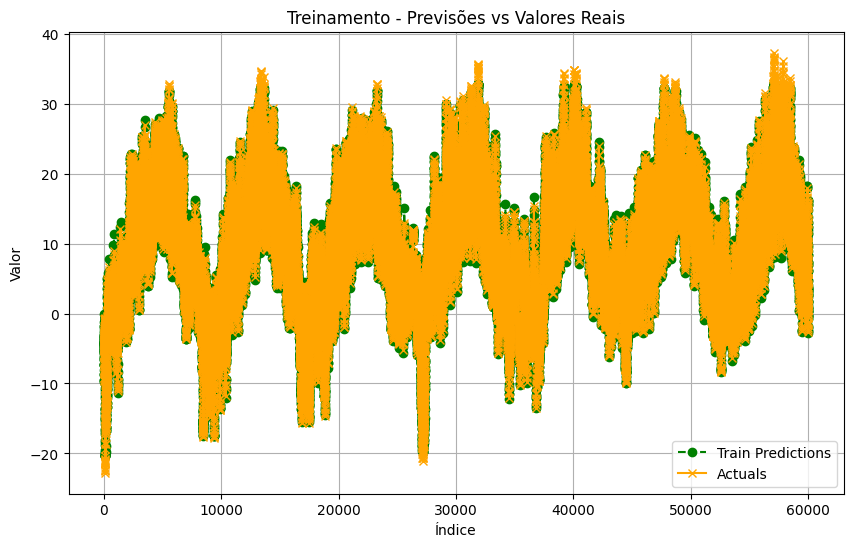

In [135]:
# Plotagem aprimorada
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar as linhas ao gráfico
plt.plot(
    train_results['Train Predictions'], 
    color="green",   # Cor da linha
    linestyle="--",  # Estilo da linha
    marker="o",      # Marcador nos pontos
    label="Train Predictions"  # Rótulo para a legenda
)

plt.plot(
    train_results['Actuals'], 
    color="orange", 
    linestyle="-", 
    marker="x", 
    label="Actuals"
)

# Configurar grade, legenda e título
plt.grid(True)               # Adiciona grade
plt.legend()                 # Adiciona a legenda
plt.title("Treinamento - Previsões vs Valores Reais")  # Título do gráfico
plt.xlabel("Índice")         # Rótulo do eixo X
plt.ylabel("Valor")          # Rótulo do eixo Y

# Exibir o gráfico
plt.show()

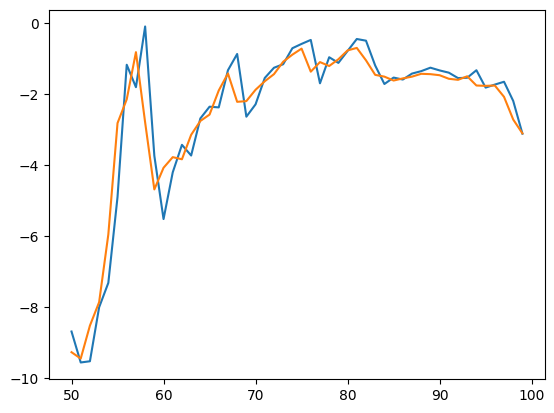

In [136]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])




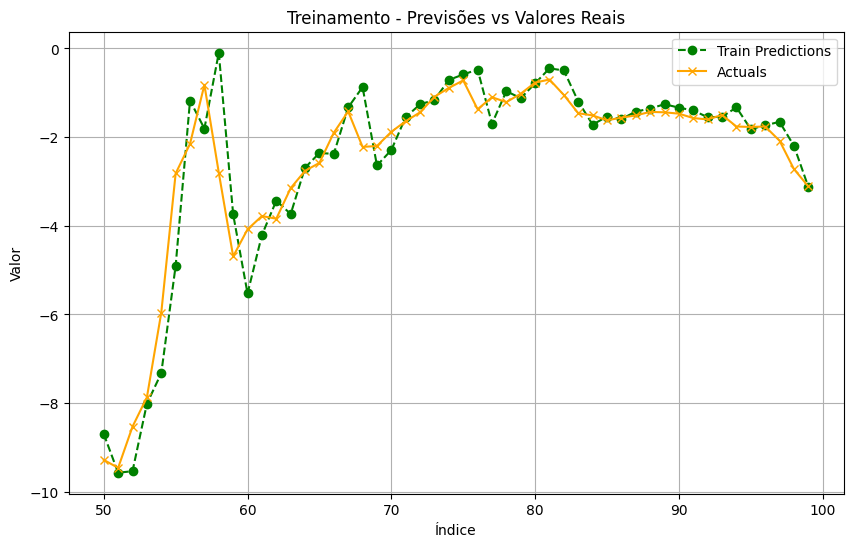

In [137]:
# Plotagem aprimorada
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar as linhas ao gráfico
plt.plot(
    train_results['Train Predictions'][50:100], 
    color="green",   # Cor da linha
    linestyle="--",  # Estilo da linha
    marker="o",      # Marcador nos pontos
    label="Train Predictions"  # Rótulo para a legenda
)

plt.plot(
    train_results['Actuals'][50:100], 
    color="orange", 
    linestyle="-", 
    marker="x", 
    label="Actuals"
)

# Configurar grade, legenda e título
plt.grid(True)               # Adiciona grade
plt.legend()                 # Adiciona a legenda
plt.title("Treinamento - Previsões vs Valores Reais")  # Título do gráfico
plt.xlabel("Índice")         # Rótulo do eixo X
plt.ylabel("Valor")          # Rótulo do eixo Y

# Exibir o gráfico
plt.show()

In [138]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Val Predictions,Actuals
0,15.523241,14.02
1,13.297771,13.67
2,12.988395,12.27
3,11.489021,11.19
4,10.351734,10.85
...,...,...
4995,17.245565,18.27
4996,17.266937,17.85
4997,17.207716,16.65
4998,15.835412,15.85


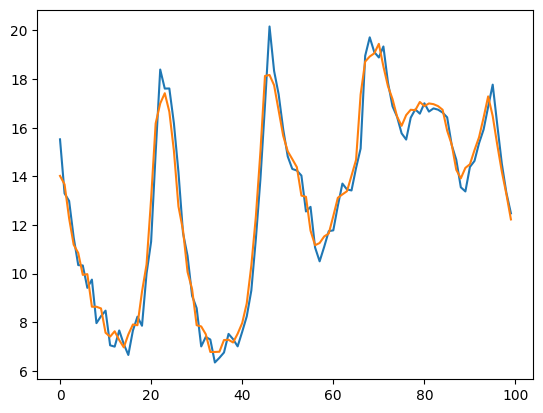

In [139]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

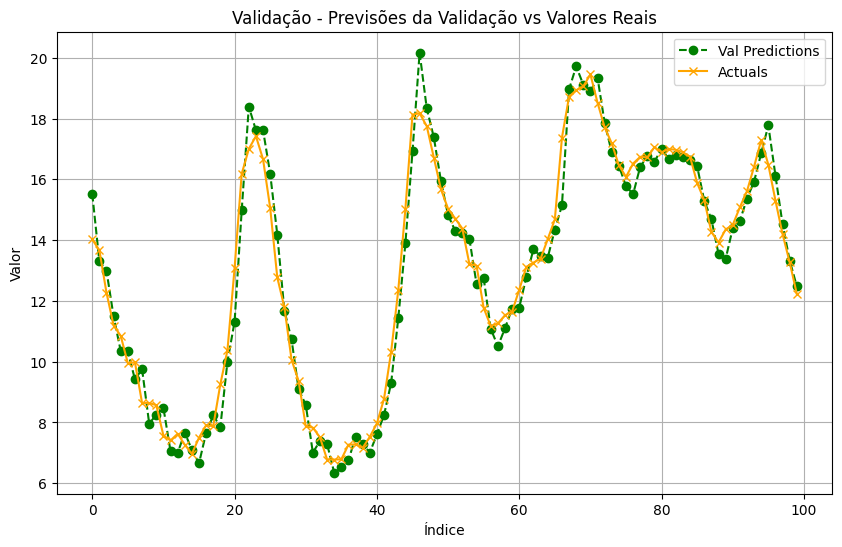

In [140]:
# Plotagem aprimorada
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar as linhas ao gráfico
plt.plot(
    val_results['Val Predictions'][:100], 
    color="green",   # Cor da linha
    linestyle="--",  # Estilo da linha
    marker="o",      # Marcador nos pontos
    label="Val Predictions"  # Rótulo para a legenda
)

plt.plot(
    val_results['Actuals'][:100], 
    color="orange", 
    linestyle="-", 
    marker="x", 
    label="Actuals"
)

# Configurar grade, legenda e título
plt.grid(True)               # Adiciona grade
plt.legend()                 # Adiciona a legenda
plt.title("Validação - Previsões da Validação vs Valores Reais")  # Título do gráfico
plt.xlabel("Índice")         # Rótulo do eixo X
plt.ylabel("Valor")          # Rótulo do eixo Y

# Exibir o gráfico
plt.show()

In [141]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Test Predictions,Actuals
0,14.370100,13.99
1,13.226905,13.46
2,12.833877,12.93
3,12.461620,12.43
4,12.015693,12.17
...,...,...
5081,-1.154684,-0.98
5082,-1.494936,-1.40
5083,-1.752027,-2.75
5084,-3.375211,-2.89


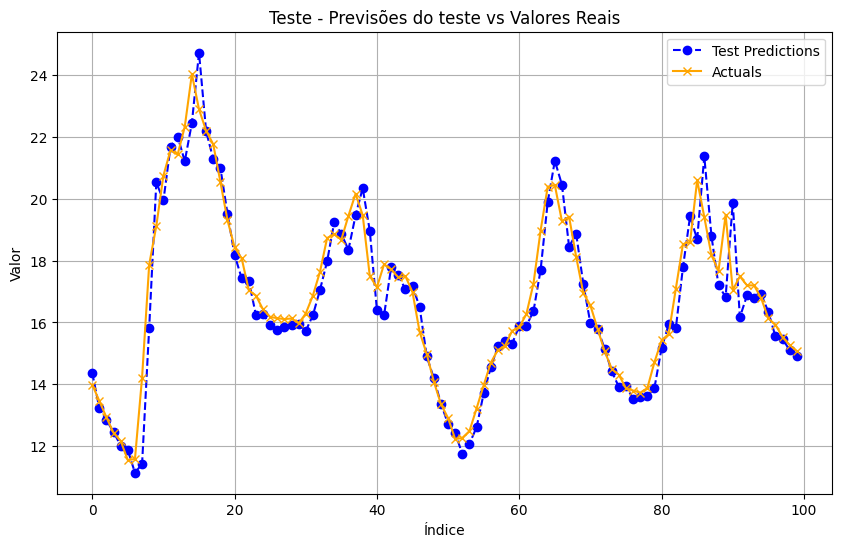

In [142]:
# Plotagem aprimorada
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar as linhas ao gráfico
plt.plot(
    test_results['Test Predictions'][:100], 
    color="blue",   # Cor da linha
    linestyle="--",  # Estilo da linha
    marker="o",      # Marcador nos pontos
    label="Test Predictions"  # Rótulo para a legenda
)

plt.plot(
    test_results['Actuals'][:100], 
    color="orange", 
    linestyle="-", 
    marker="x", 
    label="Actuals"
)

# Configurar grade, legenda e título
plt.grid(True)               # Adiciona grade
plt.legend()                 # Adiciona a legenda
plt.title("Teste - Previsões do teste vs Valores Reais")  # Título do gráfico
plt.xlabel("Índice")         # Rótulo do eixo X
plt.ylabel("Valor")          # Rótulo do eixo Y

# Exibir o gráfico
plt.show()

In [143]:
# Split

# ver o cálculo do erro

In [144]:
#!pip install scikit-learn


In [145]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(predictions, y)

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


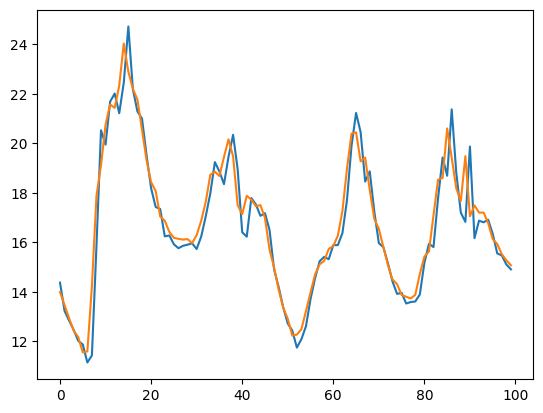

In [146]:
df_forecast, mse_cal = plot_predictions1(model1, X_test1, y_test1)

In [147]:
print('valores do MSE')
mse_cal

valores do MSE


0.6421705054588356

In [148]:
df_forecast

,Predictions,Actuals
0,14.370100,13.99
1,13.226905,13.46
2,12.833877,12.93
3,12.461620,12.43
4,12.015693,12.17
...,...,...
5081,-1.154684,-0.98
5082,-1.494936,-1.40
5083,-1.752027,-2.75
5084,-3.375211,-2.89


In [149]:
X_test1

array([[[18.27],
        [17.85],
        [16.65],
        [15.85],
        [15.09]],

       [[17.85],
        [16.65],
        [15.85],
        [15.09],
        [13.99]],

       [[16.65],
        [15.85],
        [15.09],
        [13.99],
        [13.46]],

       ...,

       [[ 2.44],
        [ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ]],

       [[ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75]],

       [[-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75],
        [-2.89]]])

In [150]:
y_test1

array([13.99, 13.46, 12.93, ..., -2.75, -2.89, -3.93])

Mean Squared Error (MSE)

O Erro Quadrático Médio (MSE, do inglês "Mean Squared Error") é uma métrica amplamente utilizada em estatística e aprendizado de máquina para avaliar a precisão de um modelo de regressão. Ele mede a média dos quadrados dos erros, onde o erro é a diferença entre o valor observado (real) e o valor predito pelo modelo.
A fórmula para calcular o MSE é:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$


Onde:

    • 𝑛 é o número total de observações.
    
    • 𝑦𝑖 é o valor observado (real) para a i-ésima observação.
    
- $$ (\hat{y}_i  )$$   é o valor predito pelo modelo para a i-ésima observação.




### Interpretação *****

    • MSE Baixo: Indica que o modelo preditivo está próximo dos valores observados e, portanto, é mais preciso.
    
    • MSE Alto: Indica que o modelo tem erros maiores em suas previsões e pode não estar representando bem os dados.
    
Vantagens do MSE (Mean Squared Error)

    1. Penalização de Grandes Erros:
    
        ◦ O MSE penaliza grandes erros de forma mais severa, o que é útil em situações onde grandes discrepâncias são inaceitáveis.
    2. Matematicamente Conveniente:
      ◦ É diferentiável, o que facilita a utilização em técnicas de otimização e ajustamento de modelos, especialmente em algoritmos de aprendizado de máquina.
      
    3. Sensibilidade:    
        ◦ Fornece uma medida sensível da dispersão dos erros, refletindo variações nos dados.
        
    4. Utilização Comum:
    
        ◦ É amplamente utilizado e bem compreendido na estatística e no aprendizado de máquina, facilitando a comparação e a comunicação dos resultados.
        
Desvantagens do MSE

    1. Influência de Outliers:
    
        ◦ Penaliza exageradamente os outliers, o que pode distorcer a avaliação do modelo se houver valores atípicos significativos.
        
    2. Unidade Diferente dos Dados:
        ◦ O MSE não está na mesma unidade dos dados originais, o que pode dificultar a interpretação direta dos resultados.
        
    3. Não Proporciona Informação de Direção:
        ◦ Similar ao MAE e RMSE, o MSE não indica se os erros são predominantemente positivos ou negativos.
    4. Complexidade Computacional:
    
        ◦ Pode ser mais computacionalmente intenso de calcular em comparação com métricas mais simples, devido ao uso do quadrado dos erros.

#2)  Multivariate Time Series Forecasting Using LSTM, GRU & 1d CNNs 


In [151]:
# continuação https://www.youtube.com/watch?v=kGdbPnMCdOg

# Teste para o segundo Modelo 

In [152]:


#Cria uma instância de um modelo sequencial, que é uma pilha linear de camadas (uma após a outra). A rede neural será construída camada por camada.
model2 = Sequential()
# Adiciona uma camada de entrada (InputLayer) que espera dados com a forma (5, 1). Isso significa que o modelo espera 5 elementos de entrada com uma única característica por elemento (um vetor de tamanho 5, com uma única coluna de dados por ponto).
model2.add(InputLayer((5, 1)))

#Adiciona uma camada convolucional unidimensional (1D) à rede.
#64: o número de filtros que a camada vai usar, ou seja, quantos diferentes mapas de características serão extraídos.
# kernel_size=2: define o tamanho do filtro (o número de elementos que a camada convolucional considera ao calcular a saída em cada passo).
model2.add(Conv1D(64, kernel_size=2))

#A camada Flatten transforma a saída da camada anterior em um vetor unidimensional. Isso é necessário porque a camada convolucional produz uma saída multidimensional, e a próxima camada (Dense) só pode receber vetores unidimensionais como entrada.
model2.add(Flatten())


#Adiciona uma camada densa (fully connected) com 8 neurônios e função de ativação ReLU.
#8: o número de neurônios nesta camada.
#'relu': a função de ativação ReLU (Rectified Linear Unit), que é comumente usada em redes neurais para introduzir não linearidade. Ela retorna 0 se a entrada for negativa e retorna a própria entrada se for positiva.
model2.add(Dense(8, 'relu'))

#Adiciona uma camada densa final com 1 neurônio e função de ativação linear.
#1: o número de neurônios nesta camada (geralmente 1 para modelos de regressão, que têm uma saída contínua).
#'linear': função de ativação linear, o que significa que a saída será uma função linear da entrada (sem qualquer transformação como no caso da ReLU ou Sigmoid). Isso é comum em problemas de regressão, #onde queremos uma saída contínua.
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 4, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │         2,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257 (8.82 KB)

 Trainable params: 2,257 (8.82 KB)

 Non-trainable params: 0 (0.00 B)

In [153]:
# temos um parâmetro menor no modelo2 em comparação com o modelo1, o que é bom. 
#compila mais rápido

In [154]:
caminho_arquivo2 = 'pastamodels'

In [155]:

cp2 = ModelCheckpoint(f'.{caminho_arquivo2}/model2.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])



In [156]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 15.6300 - root_mean_squared_error: 3.6382 - val_loss: 0.9893 - val_root_mean_squared_error: 0.9946
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.1581 - root_mean_squared_error: 1.0752 - val_loss: 0.6822 - val_root_mean_squared_error: 0.8259
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8097 - root_mean_squared_error: 0.8997 - val_loss: 0.5472 - val_root_mean_squared_error: 0.7397
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6948 - root_mean_squared_error: 0.8334 - val_loss: 0.5258 - val_root_mean_squared_error: 0.7251
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6757 - root_mean_squared_error: 0.8220 - val_loss: 0.5140 - val_root_mean_squared_error: 0.7169
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6635 - root_mean_squared_error: 0.8142 - val_loss: 0.4985 - val_root_mean_squared_error: 0.7060
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━

In [157]:
# teste 3

In [158]:
#Cria uma instância de um modelo sequencial, que é uma pilha linear de camadas (uma após a outra). A rede neural será construída camada por camada.
model3 = Sequential()

# Adiciona uma camada de entrada (InputLayer) que espera dados com a forma (5, 1). 
#Isso significa que o modelo espera 5 elementos de entrada com uma única característica por elemento (um vetor de tamanho 5, com uma única coluna de dados por ponto).
model3.add(InputLayer((5, 1)))


#Adiciona uma camada GRU (Gated Recurrent Unit) com 64 unidades.
#GRU é uma variação de redes recorrentes que processa dados sequenciais e é útil para capturar dependências temporais.
#a GRU (Gated Recurrent Unit) layer with 64 units to a sequential model in Python, typically using TensorFlow's Keras API.
model3.add(GRU(64))

#Adiciona uma camada densa (fully connected) com 8 neurônios e função de ativação ReLU.
#8: o número de neurônios nesta camada.
#'relu': a função de ativação ReLU (Rectified Linear Unit), que é comumente usada em redes neurais para introduzir não linearidade. 
#Ela retorna 0 se a entrada for negativa e retorna a própria entrada se for positiva.
model3.add(Dense(8, 'relu'))

#Adiciona uma camada densa final com 1 neurônio e função de ativação linear.
#1: o número de neurônios nesta camada (geralmente 1 para modelos de regressão, que têm uma saída contínua).
#'linear': função de ativação linear, o que significa que a saída será uma função linear da entrada (sem qualquer transformação como no caso da ReLU ou Sigmoid). 
#Isso é comum em problemas de regressão, #onde queremos uma saída contínua.
model3.add(Dense(1, 'linear'))


model3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,393 (52.32 KB)

 Trainable params: 13,393 (52.32 KB)

 Non-trainable params: 0 (0.00 B)

# ainda é alto os parâmetros


## mais propenso a overfitting se você tiver mais parâmetros e mais complexos

In [159]:
cp3 = ModelCheckpoint(f'.{caminho_arquivo2}/model3.keras', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [160]:
# treinar o modelo

In [161]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 58.7397 - root_mean_squared_error: 7.4411 - val_loss: 1.1127 - val_root_mean_squared_error: 1.0548
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.5273 - root_mean_squared_error: 1.5829 - val_loss: 0.6177 - val_root_mean_squared_error: 0.7859
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.9658 - root_mean_squared_error: 0.9821 - val_loss: 0.5200 - val_root_mean_squared_error: 0.7211
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7165 - root_mean_squared_error: 0.8464 - val_loss: 0.5049 - val_root_mean_squared_error: 0.7105
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6743 - root_mean_squared_error: 0.8210 - val_loss: 0.4984 - val_root_mean_squared_error: 0.7060
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6633 - root_mean_squared_error: 0.8144 - val_loss: 0.5104 - val_root_mean_squared_error: 0.7144
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━

In [162]:
# validaremos o modelo, múltiplas variáveis

In [163]:
temp

Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
2009-01-01 03:00:00   -8.81
2009-01-01 04:00:00   -9.05
2009-01-01 05:00:00   -9.63
                       ... 
2016-12-31 19:10:00   -0.98
2016-12-31 20:10:00   -1.40
2016-12-31 21:10:00   -2.75
2016-12-31 22:10:00   -2.89
2016-12-31 23:10:00   -3.93
Name: T (degC), Length: 70091, dtype: float64

In [164]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [165]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head(14)

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,2.588190e-01,9.659258e-01,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,5.000000e-01,8.660254e-01,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,7.071068e-01,7.071068e-01,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,8.660254e-01,5.000000e-01,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,9.659258e-01,2.588190e-01,0.012916,0.999917
2009-01-01 06:00:00,-9.67,1.230790e+09,1.000000e+00,4.339955e-12,0.013633,0.999907
2009-01-01 07:00:00,-9.17,1.230793e+09,9.659258e-01,-2.588190e-01,0.014349,0.999897
2009-01-01 08:00:00,-8.10,1.230797e+09,8.660254e-01,-5.000000e-01,0.015066,0.999886
2009-01-01 09:00:00,-7.66,1.230800e+09,7.071068e-01,-7.071068e-01,0.015783,0.999875


In [166]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head(12)

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,2.588190e-01,9.659258e-01,0.010049,0.999950
2009-01-01 02:00:00,-8.88,5.000000e-01,8.660254e-01,0.010766,0.999942
2009-01-01 03:00:00,-8.81,7.071068e-01,7.071068e-01,0.011483,0.999934
2009-01-01 04:00:00,-9.05,8.660254e-01,5.000000e-01,0.012199,0.999926
2009-01-01 05:00:00,-9.63,9.659258e-01,2.588190e-01,0.012916,0.999917
2009-01-01 06:00:00,-9.67,1.000000e+00,4.339955e-12,0.013633,0.999907
2009-01-01 07:00:00,-9.17,9.659258e-01,-2.588190e-01,0.014349,0.999897
2009-01-01 08:00:00,-8.10,8.660254e-01,-5.000000e-01,0.015066,0.999886
2009-01-01 09:00:00,-7.66,7.071068e-01,-7.071068e-01,0.015783,0.999875


In [167]:
# [[[t1, ds1], [t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5]]] [t6]
# [[[t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5], [t6, ds6]]] [t7]
# [[[t3, ds3], [t4, ds4], [t5, ds5], [t6, ds6], [t7, ds7]]] [t8]

# escolhemos 6 por conta da coluna atuais, simetria. 

In [168]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0] # para previsões de múltiplas variáveis, apenas o dado de temperatura (coluna) que é de interesse.
    y.append(label)
  return np.array(X), np.array(y)

In [169]:
X2, y2 = df_to_X_y2(temp_df, window_size=4)
X2.shape, y2.shape # caso queiramos mudar

((70087, 4, 5), (70087,))

In [170]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape



((70085, 6, 5), (70085,))

In [171]:
X2

array([[[-8.05000000e+00,  2.58819045e-01,  9.65925826e-01,
          1.00491198e-02,  9.99949506e-01],
        [-8.88000000e+00,  5.00000000e-01,  8.66025404e-01,
          1.07658633e-02,  9.99942046e-01],
        [-8.81000000e+00,  7.07106781e-01,  7.07106781e-01,
          1.14826014e-02,  9.99934073e-01],
        [-9.05000000e+00,  8.66025404e-01,  5.00000000e-01,
          1.21993335e-02,  9.99925585e-01],
        [-9.63000000e+00,  9.65925826e-01,  2.58819045e-01,
          1.29160593e-02,  9.99916584e-01],
        [-9.67000000e+00,  1.00000000e+00,  4.33995489e-12,
          1.36327785e-02,  9.99907069e-01]],

       [[-8.88000000e+00,  5.00000000e-01,  8.66025404e-01,
          1.07658633e-02,  9.99942046e-01],
        [-8.81000000e+00,  7.07106781e-01,  7.07106781e-01,
          1.14826014e-02,  9.99934073e-01],
        [-9.05000000e+00,  8.66025404e-01,  5.00000000e-01,
          1.21993335e-02,  9.99925585e-01],
        [-9.63000000e+00,  9.65925826e-01,  2.58819045e-01,
  

In [172]:
y2

array([-9.17, -8.1 , -7.66, ..., -2.75, -2.89, -3.93])

In [173]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [174]:
X2_train

array([[[-8.05000000e+00,  2.58819045e-01,  9.65925826e-01,
          1.00491198e-02,  9.99949506e-01],
        [-8.88000000e+00,  5.00000000e-01,  8.66025404e-01,
          1.07658633e-02,  9.99942046e-01],
        [-8.81000000e+00,  7.07106781e-01,  7.07106781e-01,
          1.14826014e-02,  9.99934073e-01],
        [-9.05000000e+00,  8.66025404e-01,  5.00000000e-01,
          1.21993335e-02,  9.99925585e-01],
        [-9.63000000e+00,  9.65925826e-01,  2.58819045e-01,
          1.29160593e-02,  9.99916584e-01],
        [-9.67000000e+00,  1.00000000e+00,  4.33995489e-12,
          1.36327785e-02,  9.99907069e-01]],

       [[-8.88000000e+00,  5.00000000e-01,  8.66025404e-01,
          1.07658633e-02,  9.99942046e-01],
        [-8.81000000e+00,  7.07106781e-01,  7.07106781e-01,
          1.14826014e-02,  9.99934073e-01],
        [-9.05000000e+00,  8.66025404e-01,  5.00000000e-01,
          1.21993335e-02,  9.99925585e-01],
        [-9.63000000e+00,  9.65925826e-01,  2.58819045e-01,
  

In [175]:
len(X2_train[:, :, 0])

60000

In [176]:
X2_train[:, :, 0] #pega apenas os primeiro números da linha das listas, com 6 listas,

array([[-8.05, -8.88, -8.81, -9.05, -9.63, -9.67],
       [-8.88, -8.81, -9.05, -9.63, -9.67, -9.17],
       [-8.81, -9.05, -9.63, -9.67, -9.17, -8.1 ],
       ...,
       [ 2.02,  2.27,  4.71,  6.07,  9.88, 13.53],
       [ 2.27,  4.71,  6.07,  9.88, 13.53, 15.43],
       [ 4.71,  6.07,  9.88, 13.53, 15.43, 15.54]])

In [177]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_mean # média

np.float64(9.42066863888889)

In [178]:
temp_training_std = np.std(X2_train[:, :, 0])
temp_training_std # desvio padrão

np.float64(8.508178398940622)

In [179]:
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [180]:
X2_train

array([[[-8.05000000e+00,  2.58819045e-01,  9.65925826e-01,
          1.00491198e-02,  9.99949506e-01],
        [-8.88000000e+00,  5.00000000e-01,  8.66025404e-01,
          1.07658633e-02,  9.99942046e-01],
        [-8.81000000e+00,  7.07106781e-01,  7.07106781e-01,
          1.14826014e-02,  9.99934073e-01],
        [-9.05000000e+00,  8.66025404e-01,  5.00000000e-01,
          1.21993335e-02,  9.99925585e-01],
        [-9.63000000e+00,  9.65925826e-01,  2.58819045e-01,
          1.29160593e-02,  9.99916584e-01],
        [-9.67000000e+00,  1.00000000e+00,  4.33995489e-12,
          1.36327785e-02,  9.99907069e-01]],

       [[-8.88000000e+00,  5.00000000e-01,  8.66025404e-01,
          1.07658633e-02,  9.99942046e-01],
        [-8.81000000e+00,  7.07106781e-01,  7.07106781e-01,
          1.14826014e-02,  9.99934073e-01],
        [-9.05000000e+00,  8.66025404e-01,  5.00000000e-01,
          1.21993335e-02,  9.99925585e-01],
        [-9.63000000e+00,  9.65925826e-01,  2.58819045e-01,
  

In [181]:
preprocess(X2_train)


array([[[-2.05339708e+00,  2.58819045e-01,  9.65925826e-01,
          1.00491198e-02,  9.99949506e-01],
        [-2.15095027e+00,  5.00000000e-01,  8.66025404e-01,
          1.07658633e-02,  9.99942046e-01],
        [-2.14272289e+00,  7.07106781e-01,  7.07106781e-01,
          1.14826014e-02,  9.99934073e-01],
        [-2.17093105e+00,  8.66025404e-01,  5.00000000e-01,
          1.21993335e-02,  9.99925585e-01],
        [-2.23910075e+00,  9.65925826e-01,  2.58819045e-01,
          1.29160593e-02,  9.99916584e-01],
        [-2.24380211e+00,  1.00000000e+00,  4.33995489e-12,
          1.36327785e-02,  9.99907069e-01]],

       [[-2.15095027e+00,  5.00000000e-01,  8.66025404e-01,
          1.07658633e-02,  9.99942046e-01],
        [-2.14272289e+00,  7.07106781e-01,  7.07106781e-01,
          1.14826014e-02,  9.99934073e-01],
        [-2.17093105e+00,  8.66025404e-01,  5.00000000e-01,
          1.21993335e-02,  9.99925585e-01],
        [-2.23910075e+00,  9.65925826e-01,  2.58819045e-01,
  

In [182]:
X2_train

array([[[-2.05339708e+00,  2.58819045e-01,  9.65925826e-01,
          1.00491198e-02,  9.99949506e-01],
        [-2.15095027e+00,  5.00000000e-01,  8.66025404e-01,
          1.07658633e-02,  9.99942046e-01],
        [-2.14272289e+00,  7.07106781e-01,  7.07106781e-01,
          1.14826014e-02,  9.99934073e-01],
        [-2.17093105e+00,  8.66025404e-01,  5.00000000e-01,
          1.21993335e-02,  9.99925585e-01],
        [-2.23910075e+00,  9.65925826e-01,  2.58819045e-01,
          1.29160593e-02,  9.99916584e-01],
        [-2.24380211e+00,  1.00000000e+00,  4.33995489e-12,
          1.36327785e-02,  9.99907069e-01]],

       [[-2.15095027e+00,  5.00000000e-01,  8.66025404e-01,
          1.07658633e-02,  9.99942046e-01],
        [-2.14272289e+00,  7.07106781e-01,  7.07106781e-01,
          1.14826014e-02,  9.99934073e-01],
        [-2.17093105e+00,  8.66025404e-01,  5.00000000e-01,
          1.21993335e-02,  9.99925585e-01],
        [-2.23910075e+00,  9.65925826e-01,  2.58819045e-01,
  

In [183]:
X2_val

array([[[ 6.07000000e+00,  2.58819045e-01, -9.65925826e-01,
         -8.37418535e-01,  5.46562163e-01],
        [ 9.88000000e+00,  8.46725985e-12, -1.00000000e+00,
         -8.37026554e-01,  5.47162269e-01],
        [ 1.35300000e+01, -2.58819045e-01, -9.65925826e-01,
         -8.36634142e-01,  5.47762094e-01],
        [ 1.54300000e+01, -5.00000000e-01, -8.66025404e-01,
         -8.36241301e-01,  5.48361638e-01],
        [ 1.55400000e+01, -7.07106781e-01, -7.07106781e-01,
         -8.35848030e-01,  5.48960900e-01],
        [ 1.40200000e+01, -8.66025404e-01, -5.00000000e-01,
         -8.35454330e-01,  5.49559880e-01]],

       [[ 9.88000000e+00,  8.46725985e-12, -1.00000000e+00,
         -8.37026554e-01,  5.47162269e-01],
        [ 1.35300000e+01, -2.58819045e-01, -9.65925826e-01,
         -8.36634142e-01,  5.47762094e-01],
        [ 1.54300000e+01, -5.00000000e-01, -8.66025404e-01,
         -8.36241301e-01,  5.48361638e-01],
        [ 1.55400000e+01, -7.07106781e-01, -7.07106781e-01,
  

In [184]:
preprocess(X2_val)


array([[[-3.93817393e-01,  2.58819045e-01, -9.65925826e-01,
         -8.37418535e-01,  5.46562163e-01],
        [ 5.39870392e-02,  8.46725985e-12, -1.00000000e+00,
         -8.37026554e-01,  5.47162269e-01],
        [ 4.82986036e-01, -2.58819045e-01, -9.65925826e-01,
         -8.36634142e-01,  5.47762094e-01],
        [ 7.06300583e-01, -5.00000000e-01, -8.66025404e-01,
         -8.36241301e-01,  5.48361638e-01],
        [ 7.19229320e-01, -7.07106781e-01, -7.07106781e-01,
         -8.35848030e-01,  5.48960900e-01],
        [ 5.40577682e-01, -8.66025404e-01, -5.00000000e-01,
         -8.35454330e-01,  5.49559880e-01]],

       [[ 5.39870392e-02,  8.46725985e-12, -1.00000000e+00,
         -8.37026554e-01,  5.47162269e-01],
        [ 4.82986036e-01, -2.58819045e-01, -9.65925826e-01,
         -8.36634142e-01,  5.47762094e-01],
        [ 7.06300583e-01, -5.00000000e-01, -8.66025404e-01,
         -8.36241301e-01,  5.48361638e-01],
        [ 7.19229320e-01, -7.07106781e-01, -7.07106781e-01,
  

In [185]:
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

In [186]:
# só altera a primeira da primeira lista

# Usar o modelo 4

In [187]:

# O modelo é criado usando a classe Sequential, que permite empilhar camadas de forma simples e linear.
#- Criação do modelo
# Inicializa um modelo sequencial, onde as camadas serão adicionadas uma após a outra. 
model4 = Sequential()

# - Define a camada de entrada com forma (6, 5):
# 6: O tamanho da janela temporal (sequência de entrada).
# 5: O número de features em cada passo temporal.
model4.add(InputLayer((6, 5)))



# Adiciona uma camada Long Short-Term Memory (LSTM) com 64 unidades. Camada LSTM
# LSTMs são usadas para modelar dados sequenciais, como séries temporais.
# Cada unidade LSTM tem memória interna que pode capturar dependências de longo prazo nas sequências.
model4.add(LSTM(64))


# Camada Dense  (com ativação ReLU)
# Adiciona uma camada densa totalmente conectada com:
# 8 unidades: Aprenderá padrões de alto nível após a saída da LSTM.
# Função de ativação 'relu': Mantém apenas valores positivos, o que ajuda a evitar problemas de gradientes (vanishing gradient).
model4.add(Dense(8, 'relu'))

#  Camada Dense (com ativação Linear)
# Adiciona uma camada densa com:
# 1 unidade: Produz a previsão final, geralmente um único valor em problemas de regressão.
# Ativação 'linear': A saída é contínua e não transformada, adequada para regressão.
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,449 (72.07 KB)

 Trainable params: 18,449 (72.07 KB)

 Non-trainable params: 0 (0.00 B)

In [188]:
cp4 = ModelCheckpoint(f'.{caminho_arquivo}/model4.keras', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [189]:
cp4

In [190]:
model4

<Sequential name=sequential_7, built=True>

In [191]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 78.1518 - root_mean_squared_error: 8.5555 - val_loss: 3.7993 - val_root_mean_squared_error: 1.9492
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 5.5393 - root_mean_squared_error: 2.3491 - val_loss: 2.4024 - val_root_mean_squared_error: 1.5500
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 2.6314 - root_mean_squared_error: 1.6207 - val_loss: 1.2402 - val_root_mean_squared_error: 1.1137
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 1.3349 - root_mean_squared_error: 1.1545 - val_loss: 0.8075 - val_root_mean_squared_error: 0.8986
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.9052 - root_mean_squared_error: 0.9511 - val_loss: 0.6141 - val_root_mean_squared_error: 0.7836
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.7131 - root_mean_squared_error: 0.8442 - val_loss: 0.4913 - val_root_mean_squared_error: 0.7009
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━

Conjunto de dados de treino e de validação, 

O modelo será treinado usando o conjunto de dados de treinamento, mas após cada época (ou seja, a cada ciclo completo de treinamento), ele será avaliado nos dados de validação. Isso ajuda a monitorar o desempenho do modelo e evitar o overfitting.

* epochs=10 => epochs: Número de épocas, ou seja, o número de vezes que o modelo irá percorrer o conjunto de dados de treinamento completo.

Nesse caso, o modelo passará 10 vezes pelos dados de treinamento.

callbacks=[cp1]

callbacks: Lista de callbacks a serem usados durante o treinamento.

cp1 é um callback criado anteriormente com o ModelCheckpoint, que salvará o modelo após cada época, mas apenas se for o melhor modelo (com base na métrica de validação definida).


Treinar modelos de aprendizado de máquina para métodos de regressão ou classificação


159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(      Predictions  Actuals
 0       13.368936    13.46
 1       12.961694    12.93
 2       12.565911    12.43
 3       12.269307    12.17
 4       12.370838    11.55
 ...           ...      ...
 5080    -1.219996    -0.98
 5081    -1.504074    -1.40
 5082    -1.721477    -2.75
 5083    -3.119867    -2.89
 5084    -3.076817    -3.93
 
 [5085 rows x 2 columns],
 0.48993698201065927)

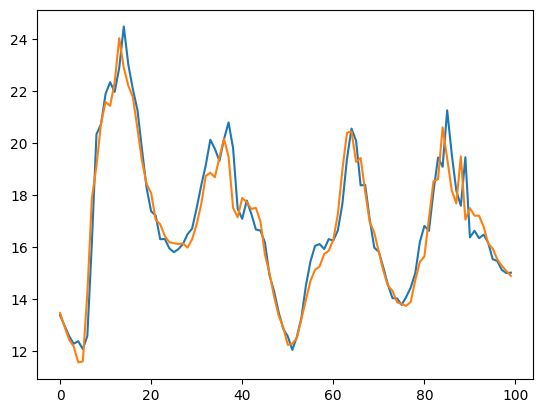

In [242]:
plot_predictions1(model4, X2_test, y2_test)


In [245]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [239]:

def plot_predictions_repaginada(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions': predictions, 'Actuals': y})

    # Plotagem aprimorada
    plt.figure(figsize=(10, 6))  # Define o tamanho da figura

    # Adicionar as linhas ao gráfico
    plt.plot(
        df['Predictions'][start:end], 
        color="purple",   # Cor da linha
        linestyle="--",  # Estilo da linha
        marker="o",      # Marcador nos pontos
        label="Predictions"  # Rótulo para a legenda
    )

    plt.plot(
        df['Actuals'][start:end], 
        color="orange", 
        linestyle="-", 
        marker="x", 
        label="Actuals"
    )

    # Configurar grade, legenda e título
    plt.grid(True)               # Adiciona grade
    plt.legend()                 # Adiciona a legenda
    plt.title("Previsões vs Valores Reais")  # Título do gráfico
    plt.xlabel("Índice")         # Rótulo do eixo X
    plt.ylabel("Valor")          # Rótulo do eixo Y

    # Exibir o gráfico
    plt.show()  

    # Calcula o MSE
    valor_mse = mse(predictions, y)
    print('Calcula o MSE : ',valor_mse)
    return df, valor_mse

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


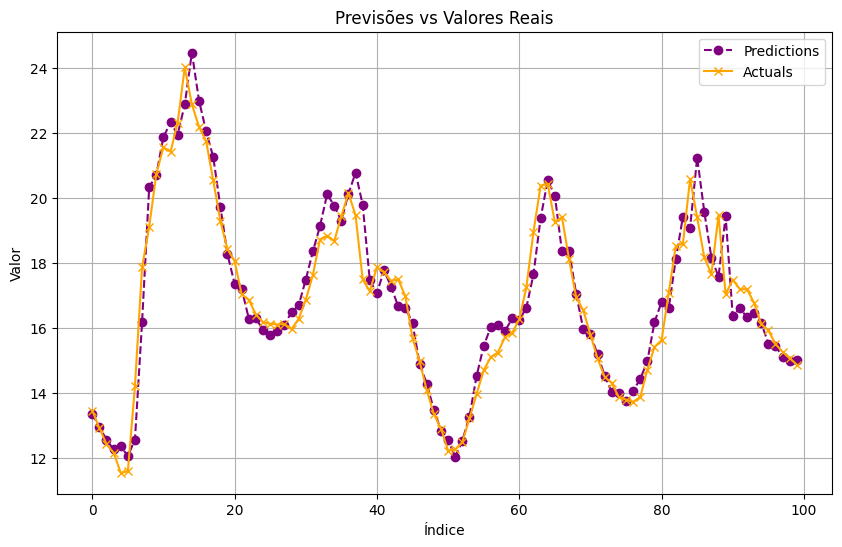

Calcula o MSE :  0.48993698201065927


(      Predictions  Actuals
 0       13.368936    13.46
 1       12.961694    12.93
 2       12.565911    12.43
 3       12.269307    12.17
 4       12.370838    11.55
 ...           ...      ...
 5080    -1.219996    -0.98
 5081    -1.504074    -1.40
 5082    -1.721477    -2.75
 5083    -3.119867    -2.89
 5084    -3.076817    -3.93
 
 [5085 rows x 2 columns],
 0.48993698201065927)

In [240]:
plot_predictions_repaginada(model4, X2_test, y2_test)

In [248]:
temp_df

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,-0.675590,0.737277,0.008334,0.999965


In [266]:
len(y2_test)

5085

In [263]:
temp_df_test= temp_df[65000:]

original_date_column = list(temp_df_test.index)
original_date_column

[Timestamp('2016-05-30 19:00:00'),
 Timestamp('2016-05-30 20:00:00'),
 Timestamp('2016-05-30 21:00:00'),
 Timestamp('2016-05-30 22:00:00'),
 Timestamp('2016-05-30 23:00:00'),
 Timestamp('2016-05-31 00:00:00'),
 Timestamp('2016-05-31 01:00:00'),
 Timestamp('2016-05-31 02:00:00'),
 Timestamp('2016-05-31 03:00:00'),
 Timestamp('2016-05-31 04:00:00'),
 Timestamp('2016-05-31 05:00:00'),
 Timestamp('2016-05-31 06:00:00'),
 Timestamp('2016-05-31 07:00:00'),
 Timestamp('2016-05-31 08:00:00'),
 Timestamp('2016-05-31 09:00:00'),
 Timestamp('2016-05-31 10:00:00'),
 Timestamp('2016-05-31 11:00:00'),
 Timestamp('2016-05-31 12:00:00'),
 Timestamp('2016-05-31 13:00:00'),
 Timestamp('2016-05-31 14:00:00'),
 Timestamp('2016-05-31 15:00:00'),
 Timestamp('2016-05-31 16:00:00'),
 Timestamp('2016-05-31 17:00:00'),
 Timestamp('2016-05-31 18:00:00'),
 Timestamp('2016-05-31 19:00:00'),
 Timestamp('2016-05-31 20:00:00'),
 Timestamp('2016-05-31 21:00:00'),
 Timestamp('2016-05-31 22:00:00'),
 Timestamp('2016-05-

In [267]:
len(temp_df_test)

5091

In [399]:

def plot_predictions_repaginada2(model, X, y, original_date_column, start=0, end=100):
    predictions = model.predict(X).flatten()
    #df = pd.DataFrame(data={'Predictions': predictions, 'Actuals': y})
    df = pd.DataFrame({
       # 'Date Time': original_date_column,  # Substitua pela sua coluna de data original
        'Predictions': predictions,
        'Actuals': y
    })
    # Plotagem aprimorada
    plt.figure(figsize=(10, 6))  # Define o tamanho da figura

    # Adicionar as linhas ao gráfico
    plt.plot(
        df['Predictions'][start:end], 
        color="purple",   # Cor da linha
        linestyle="--",  # Estilo da linha
        marker="o",      # Marcador nos pontos
        label="Predictions"  # Rótulo para a legenda
    )

    plt.plot(
        df['Actuals'][start:end], 
        color="orange", 
        linestyle="-", 
        marker="x", 
        label="Actuals"
    )

    # Configurar grade, legenda e título
    plt.grid(True)               # Adiciona grade
    plt.legend()                 # Adiciona a legenda
    plt.title("Previsões vs Valores Reais")  # Título do gráfico
    plt.xlabel("Índice")         # Rótulo do eixo X
    plt.ylabel("Valor")          # Rótulo do eixo Y

    # Exibir o gráfico
    plt.show()  

    # Calcula o MSE
    valor_mse = mse(predictions, y)
    print('Calcula o MSE : ',valor_mse)
    return df, valor_mse

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


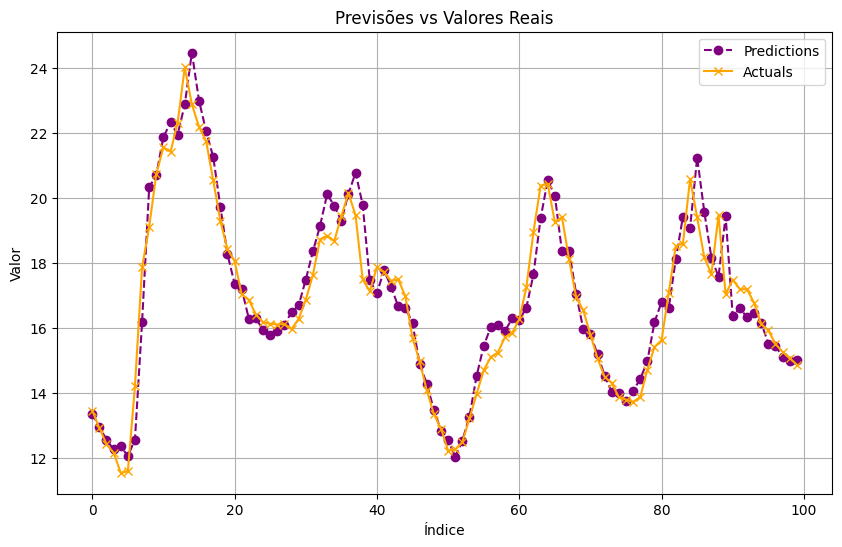

Calcula o MSE :  0.48993698201065927


(      Predictions  Actuals
 0       13.368936    13.46
 1       12.961694    12.93
 2       12.565911    12.43
 3       12.269307    12.17
 4       12.370838    11.55
 ...           ...      ...
 5080    -1.219996    -0.98
 5081    -1.504074    -1.40
 5082    -1.721477    -2.75
 5083    -3.119867    -2.89
 5084    -3.076817    -3.93
 
 [5085 rows x 2 columns],
 0.48993698201065927)

In [400]:
plot_predictions_repaginada2(model4, X2_test, y2_test, original_date_column)

# adicionar a Pressão nos cálculos

In [401]:
df


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,2016-12-31 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [402]:
df= df.reset_index(drop=True)


In [403]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,2016-12-31 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [404]:
temp_df

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,-0.675590,0.737277,0.008334,0.999965


In [405]:
temp_df

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,-0.675590,0.737277,0.008334,0.999965


In [406]:
temp_df2= temp_df.reset_index(drop=False)

In [407]:
temp_df2

,Date Time,Temperature,Day sin,Day cos,Year sin,Year cos
0,2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
1,2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2,2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
3,2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
4,2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
70086,2016-12-31 19:10:00,-0.98,-0.953717,0.300706,0.006900,0.999976
70087,2016-12-31 20:10:00,-1.40,-0.843391,0.537300,0.007617,0.999971
70088,2016-12-31 21:10:00,-2.75,-0.675590,0.737277,0.008334,0.999965
70089,2016-12-31 22:10:00,-2.89,-0.461749,0.887011,0.009050,0.999959


In [408]:
# Converte a coluna 'Date Time' para o formato desejado
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

In [409]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,2016-12-31 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [410]:
p_temp_merged_df = pd.merge(temp_df2, df, on='Date Time', how='left')  # 'inner', 'left', 'right', 'outer'
p_temp_merged_df

,Date Time,Temperature,Day sin,Day cos,Year sin,Year cos,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70195,2016-12-31 19:10:00,-0.98,-0.953717,0.300706,0.006900,0.999976,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
70196,2016-12-31 20:10:00,-1.40,-0.843391,0.537300,0.007617,0.999971,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
70197,2016-12-31 21:10:00,-2.75,-0.675590,0.737277,0.008334,0.999965,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
70198,2016-12-31 22:10:00,-2.89,-0.461749,0.887011,0.009050,0.999959,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [411]:
#p_temp_df = pd.concat([df['p (mbar)'], temp_df.reset_index(drop=False)], axis=1)


In [412]:
p_temp_merged_df.head()

,Date Time,Temperature,Day sin,Day cos,Year sin,Year cos,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [413]:
p_temp_merged_df2= p_temp_merged_df[['Date Time','p (mbar)','Temperature', 'Day sin', 'Day cos', 'Year sin', 'Year cos']]

In [414]:
p_temp_merged_df2.columns

Index(['Date Time', 'p (mbar)', 'Temperature', 'Day sin', 'Day cos',
       'Year sin', 'Year cos'],
      dtype='object')

In [415]:
p_temp_merged_df2

,Date Time,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
0,2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
1,2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2,2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
3,2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
4,2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...,...
70195,2016-12-31 19:10:00,1002.18,-0.98,-0.953717,0.300706,0.006900,0.999976
70196,2016-12-31 20:10:00,1001.40,-1.40,-0.843391,0.537300,0.007617,0.999971
70197,2016-12-31 21:10:00,1001.19,-2.75,-0.675590,0.737277,0.008334,0.999965
70198,2016-12-31 22:10:00,1000.65,-2.89,-0.461749,0.887011,0.009050,0.999959


In [416]:
# Agora defina a coluna 'Date Time' como índice
p_temp_merged_df3= p_temp_merged_df2.set_index('Date Time')

In [417]:
p_temp_merged_df3

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,1001.40,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,1001.19,-2.75,-0.675590,0.737277,0.008334,0.999965


In [418]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]] #coletaremos as duas primeiras linhas a da pressão e da emperatura 
    y.append(label)
  return np.array(X), np.array(y)

In [419]:
X3, y3 = df_to_X_y3(p_temp_merged_df3)
X3.shape, y3.shape

#(linhas, window_size, variáveis), (linhas , previsão da pres. e temp)
# tem que ser mais ou menos((70084, 7, 6), (70084, 2))
# verificar o p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)



((70193, 7, 6), (70193, 2))

In [420]:
X3

array([[[ 9.96500000e+02, -8.05000000e+00,  2.58819045e-01,
          9.65925826e-01,  1.00491198e-02,  9.99949506e-01],
        [ 9.96620000e+02, -8.88000000e+00,  5.00000000e-01,
          8.66025404e-01,  1.07658633e-02,  9.99942046e-01],
        [ 9.96840000e+02, -8.81000000e+00,  7.07106781e-01,
          7.07106781e-01,  1.14826014e-02,  9.99934073e-01],
        ...,
        [ 9.97460000e+02, -9.63000000e+00,  9.65925826e-01,
          2.58819045e-01,  1.29160593e-02,  9.99916584e-01],
        [ 9.97710000e+02, -9.67000000e+00,  1.00000000e+00,
          4.33995489e-12,  1.36327785e-02,  9.99907069e-01],
        [ 9.98330000e+02, -9.17000000e+00,  9.65925826e-01,
         -2.58819045e-01,  1.43494907e-02,  9.99897041e-01]],

       [[ 9.96620000e+02, -8.88000000e+00,  5.00000000e-01,
          8.66025404e-01,  1.07658633e-02,  9.99942046e-01],
        [ 9.96840000e+02, -8.81000000e+00,  7.07106781e-01,
          7.07106781e-01,  1.14826014e-02,  9.99934073e-01],
        [ 9.96990

In [421]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5193, 7, 6), (5193, 2))

 pre-process our output

In [422]:
X3_train[:, :, 0]
# dados da pressão

array([[ 996.5 ,  996.62,  996.84, ...,  997.46,  997.71,  998.33],
       [ 996.62,  996.84,  996.99, ...,  997.71,  998.33,  999.17],
       [ 996.84,  996.99,  997.46, ...,  998.33,  999.17,  999.69],
       ...,
       [1003.01, 1003.09, 1003.34, ..., 1003.26, 1003.1 , 1003.11],
       [1003.09, 1003.34, 1003.35, ..., 1003.1 , 1003.11, 1003.46],
       [1003.34, 1003.35, 1003.26, ..., 1003.11, 1003.46, 1003.25]])

In [423]:
# dados da temperatura
X3_train[:, :, 1]

array([[-8.05, -8.88, -8.81, ..., -9.63, -9.67, -9.17],
       [-8.88, -8.81, -9.05, ..., -9.67, -9.17, -8.1 ],
       [-8.81, -9.05, -9.63, ..., -9.17, -8.1 , -7.66],
       ...,
       [ 9.09,  8.23,  8.29, ...,  7.93,  7.66,  7.76],
       [ 8.23,  8.29,  7.95, ...,  7.66,  7.76,  6.91],
       [ 8.29,  7.95,  7.93, ...,  7.76,  6.91,  5.79]])

In [424]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

In [425]:
def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [426]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [427]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[ 0.18951783,  0.92474917],
       [ 0.184659  ,  0.96701836],
       [ 0.15307664,  1.07034304],
       ...,
       [ 1.48682415, -1.43175806],
       [ 1.42123001, -1.44819608],
       [ 1.35563587, -1.57030707]])

In [428]:


model5 = Sequential()

#number 7 because of window_size=7, 6 number of variable
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))

#change this off screen and change this to two (2). Linear. First pressure and second temperature.
model5.add(Dense(2, 'linear'))

model5.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 64)             │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,714 (73.10 KB)

 Trainable params: 18,714 (73.10 KB)

 Non-trainable params: 0 (0.00 B)

In [429]:
cp5 = ModelCheckpoint(f'.{caminho_arquivo}/model5.keras', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [430]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3103 - root_mean_squared_error: 0.5280 - val_loss: 0.0307 - val_root_mean_squared_error: 0.1753
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0259 - root_mean_squared_error: 0.1608 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1243
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0144 - root_mean_squared_error: 0.1198 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0910
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0081 - root_mean_squared_error: 0.0898 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0752
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0074 - root_mean_squared_error: 0.0857 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0691
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0053 - root_mean_squared_error: 0.0725 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0651
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━

In [431]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1] # previsões pressão e temperatura
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.907825,0.924749,0.156707,0.189518
1,0.974208,0.967018,0.157561,0.184659
2,0.998407,1.070343,0.163375,0.153077
3,1.087221,1.184235,0.140697,0.119065
4,1.172049,1.211240,0.111469,0.087482
...,...,...,...,...
95,1.268165,1.177190,-1.322567,-1.254768
96,1.191513,1.284037,-1.258020,-1.242621
97,1.301438,1.271122,-1.246663,-1.226830
98,1.269946,1.278167,-1.223400,-1.266915


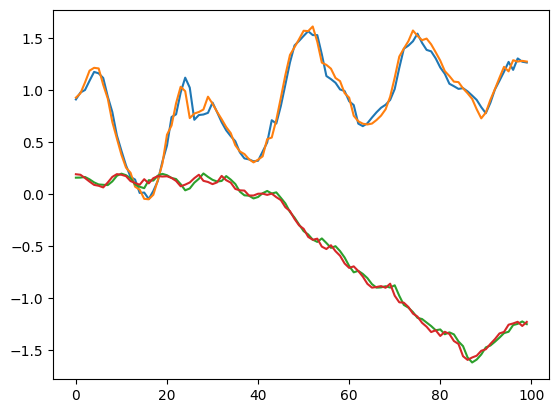

In [432]:
plot_predictions2(model5, X3_test, y3_test)

In [433]:
def plot_predictions2_ver2(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
    p_actuals, temp_actuals = y[:, 0], y[:, 1]
    
    # Criando o DataFrame com as previsões e valores reais
    df = pd.DataFrame(data={
        'Temperature Predictions': temp_preds,
        'Temperature Actuals': temp_actuals,
        'Pressure Predictions': p_preds,
        'Pressure Actuals': p_actuals
    })
    
    # Definir o tamanho do gráfico
    plt.figure(figsize=(12, 6))

    # Plotando as curvas com estilos e cores diferentes
    plt.plot(df['Temperature Predictions'][start:end], label='Temperature Predictions', color='red', linestyle='-', marker='o')
    plt.plot(df['Temperature Actuals'][start:end], label='Temperature Actuals', color='orange', linestyle='--', marker='x')
    plt.plot(df['Pressure Predictions'][start:end], label='Pressure Predictions', color='blue', linestyle='-', marker='s')
    plt.plot(df['Pressure Actuals'][start:end], label='Pressure Actuals', color='green', linestyle='--', marker='d')

    # Adicionando título, rótulos e legendas
    plt.title('Temperature and Pressure Predictions vs Actuals', fontsize=16)
    plt.xlabel('Index', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True, which='both', linestyle=':', linewidth=0.5)

    # Exibindo o gráfico
    plt.tight_layout()  # Para ajustar bem os espaços
    plt.show()
    
    return df[start:end]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


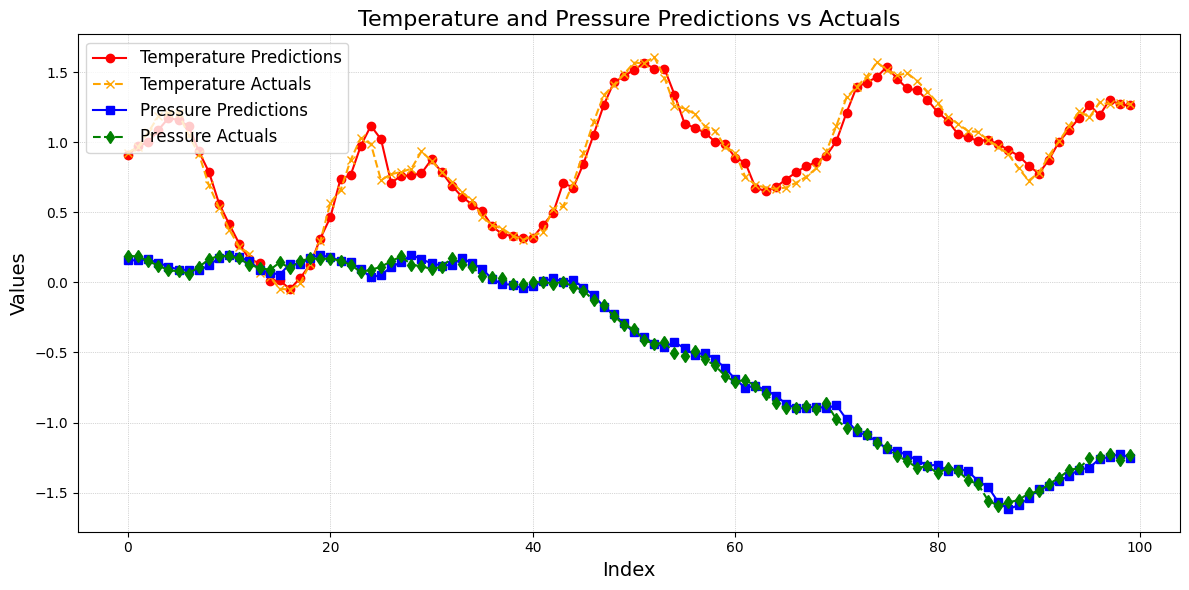

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.907825,0.924749,0.156707,0.189518
1,0.974208,0.967018,0.157561,0.184659
2,0.998407,1.070343,0.163375,0.153077
3,1.087221,1.184235,0.140697,0.119065
4,1.172049,1.211240,0.111469,0.087482
...,...,...,...,...
95,1.268165,1.177190,-1.322567,-1.254768
96,1.191513,1.284037,-1.258020,-1.242621
97,1.301438,1.271122,-1.246663,-1.226830
98,1.269946,1.278167,-1.223400,-1.266915


In [434]:
plot_predictions2_ver2(model5, X3_test, y3_test)

In [436]:
# validações na figura acima

In [441]:
# média da temperatura e desvio padrão

temp_training_mean3, temp_training_std3

(np.float64(9.444057357142857), np.float64(8.516842099935515))

In [440]:
# média da pressão e desvio padrão
p_training_mean3, p_training_std3

(np.float64(988.9498053333331), np.float64(8.232442737365968))

In [437]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [442]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1]) #processando os valores das pressões e temperaturas
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,17.175863,17.32,990.239886,990.51
1,17.741231,17.68,990.246915,990.47
2,17.947330,18.56,990.294784,990.21
3,18.703747,19.53,990.108087,989.93
4,19.426212,19.76,989.867470,989.67
...,...,...,...,...
95,20.244815,19.47,978.061848,978.62
96,19.591986,20.38,978.593230,978.72
97,20.528200,20.27,978.686723,978.85
98,20.259984,20.33,978.878235,978.52


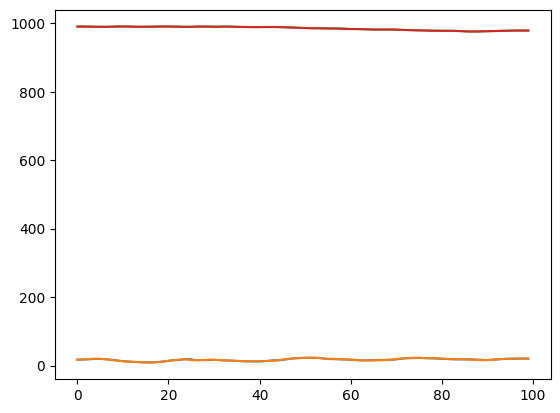

In [443]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

In [444]:

def plot_predictions2_version2(model, X, y, start=0, end=100):
    # Fazendo as previsões
    predictions = model.predict(X)
    p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])  # Processando os valores de pressão e temperatura
    p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
    
    # Criando o DataFrame com as previsões e valores reais
    df = pd.DataFrame(data={
        'Temperature Predictions': temp_preds,
        'Temperature Actuals': temp_actuals,
        'Pressure Predictions': p_preds,
        'Pressure Actuals': p_actuals
    })
    
    # Definindo o tamanho do gráfico
    plt.figure(figsize=(14, 7))

    # Plotando as curvas de forma elegante
    plt.plot(df['Temperature Predictions'][start:end], label='Temperature Predictions', color='crimson', linestyle='-', linewidth=2, marker='o', markersize=5)
    plt.plot(df['Temperature Actuals'][start:end], label='Temperature Actuals', color='orange', linestyle='--', linewidth=2, marker='x', markersize=5)
    plt.plot(df['Pressure Predictions'][start:end], label='Pressure Predictions', color='royalblue', linestyle='-', linewidth=2, marker='s', markersize=5)
    plt.plot(df['Pressure Actuals'][start:end], label='Pressure Actuals', color='forestgreen', linestyle='--', linewidth=2, marker='d', markersize=5)

    # Adicionando título, rótulos e legendas
    plt.title('Temperature and Pressure Predictions vs Actuals', fontsize=18, fontweight='bold')
    plt.xlabel('Index', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    
    # Adicionando a legenda
    plt.legend(loc='upper left', fontsize=12, title='Legend', title_fontsize='13')

    # Adicionando a grade com estilo suave
    plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
    
    # Ajustando o layout para melhor apresentação
    plt.tight_layout()
    
    # Exibindo o gráfico
    plt.show()

    return df[start:end]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


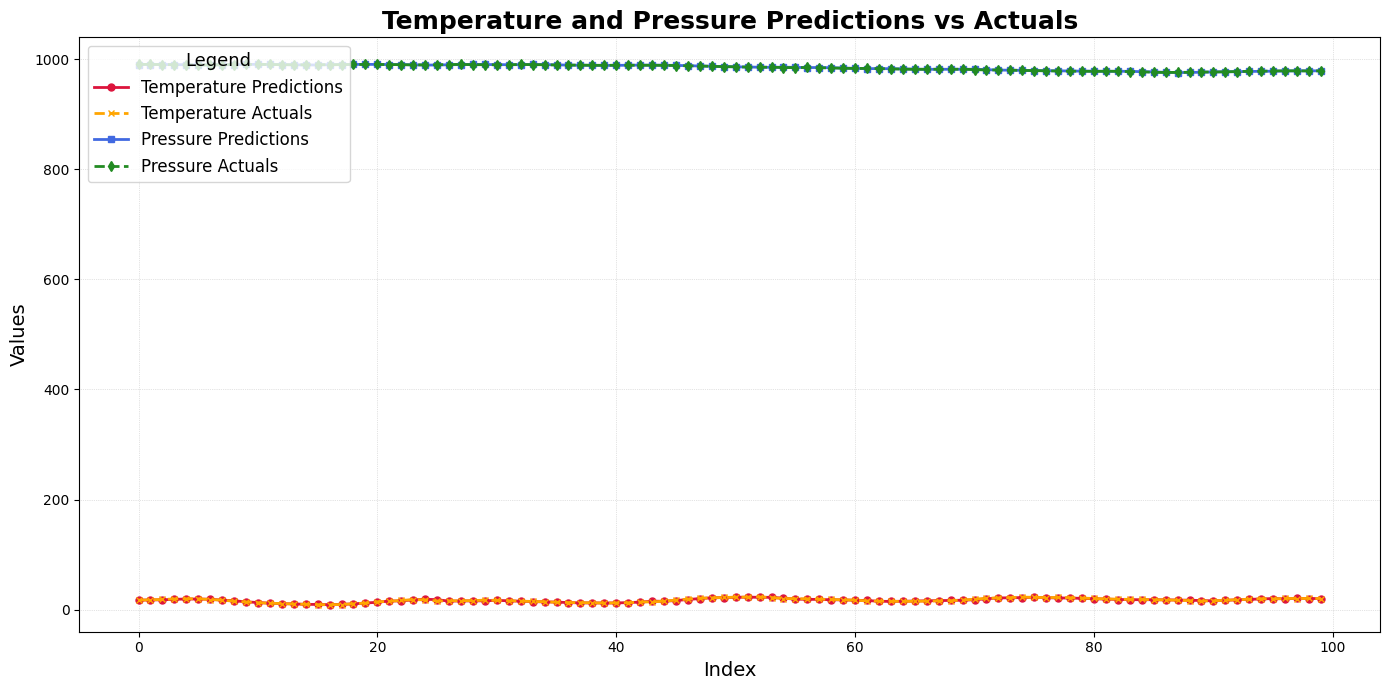

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,17.175863,17.32,990.239886,990.51
1,17.741231,17.68,990.246915,990.47
2,17.947330,18.56,990.294784,990.21
3,18.703747,19.53,990.108087,989.93
4,19.426212,19.76,989.867470,989.67
...,...,...,...,...
95,20.244815,19.47,978.061848,978.62
96,19.591986,20.38,978.593230,978.72
97,20.528200,20.27,978.686723,978.85
98,20.259984,20.33,978.878235,978.52


In [445]:
post_processed_df2 = plot_predictions2_version2(model5, X3_test, y3_test)
post_processed_df2

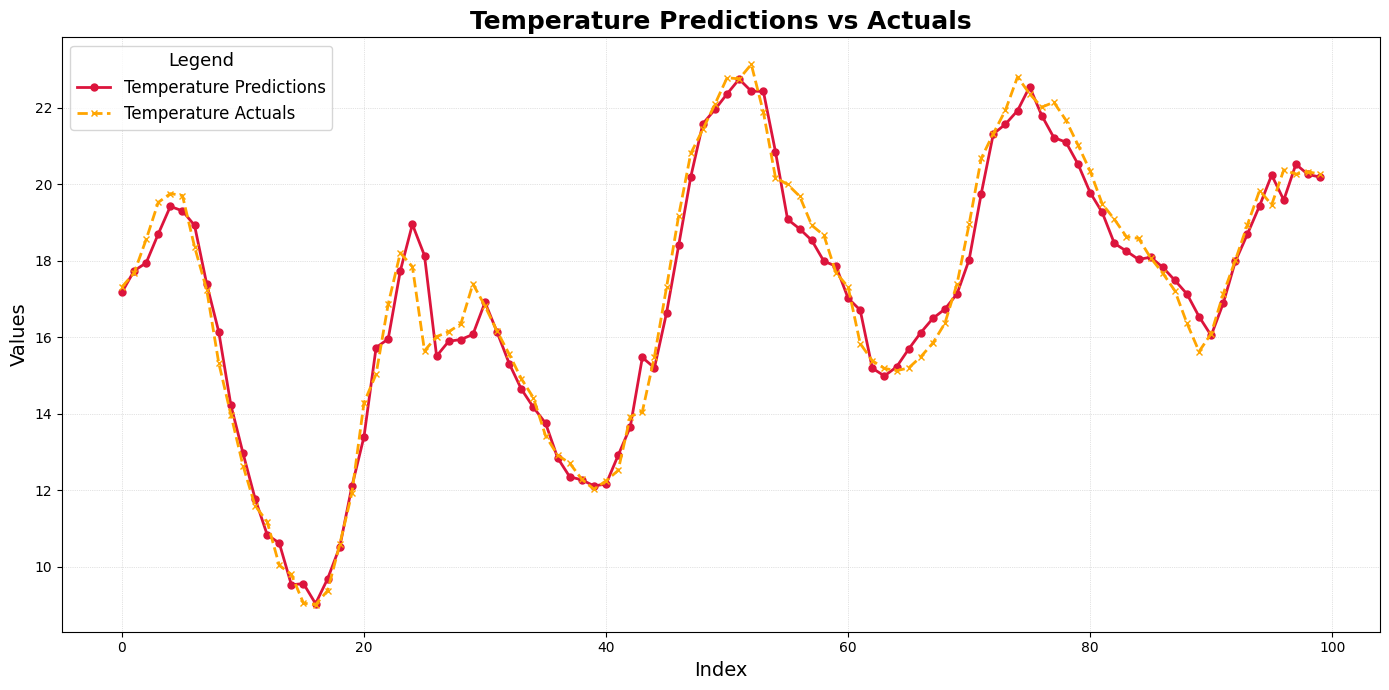

In [447]:
start, end = 0, 100


# Definindo o tamanho do gráfico
plt.figure(figsize=(14, 7))

# Plotando as curvas de forma elegante
plt.plot(post_processed_df['Temperature Predictions'][start:end], label='Temperature Predictions', color='crimson', linestyle='-', linewidth=2, marker='o', markersize=5)
plt.plot(post_processed_df['Temperature Actuals'][start:end], label='Temperature Actuals', color='orange', linestyle='--', linewidth=2, marker='x', markersize=5)

# Adicionando título, rótulos e legendas
plt.title('Temperature Predictions vs Actuals', fontsize=18, fontweight='bold')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
    
# Adicionando a legenda
plt.legend(loc='upper left', fontsize=12, title='Legend', title_fontsize='13')

# Adicionando a grade com estilo suave
plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
    
# Ajustando o layout para melhor apresentação
plt.tight_layout()
    
# Exibindo o gráfico
plt.show()

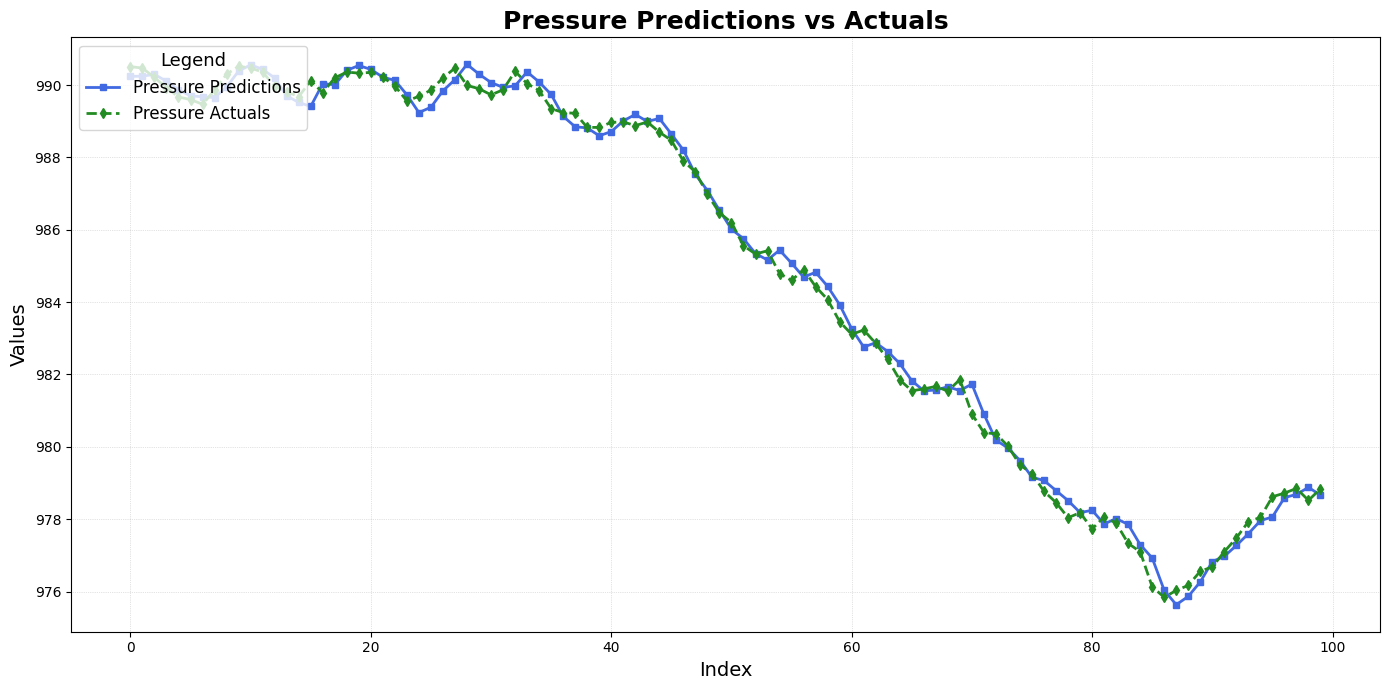

In [449]:
start, end = 0, 100


# Definindo o tamanho do gráfico
plt.figure(figsize=(14, 7))

# Plotando as curvas de forma elegante
plt.plot(post_processed_df['Pressure Predictions'][start:end], label='Pressure Predictions', color='royalblue', linestyle='-', linewidth=2, marker='s', markersize=5)
plt.plot(post_processed_df['Pressure Actuals'][start:end], label='Pressure Actuals', color='forestgreen', linestyle='--', linewidth=2, marker='d', markersize=5)

# Adicionando título, rótulos e legendas
plt.title('Pressure Predictions vs Actuals', fontsize=18, fontweight='bold')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
    
# Adicionando a legenda
plt.legend(loc='upper left', fontsize=12, title='Legend', title_fontsize='13')

# Adicionando a grade com estilo suave
plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
    
# Ajustando o layout para melhor apresentação
plt.tight_layout()
    
# Exibindo o gráfico
plt.show()

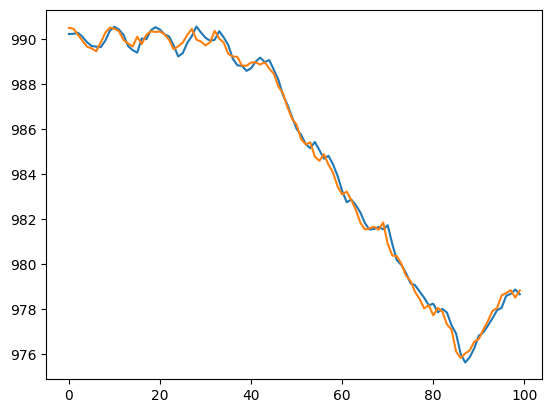

In [450]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [ ]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

In [452]:

cp6 = ModelCheckpoint(f'.{caminho_arquivo}/model6.keras', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [453]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.3017 - root_mean_squared_error: 0.5199 - val_loss: 0.0456 - val_root_mean_squared_error: 0.2136
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0382 - root_mean_squared_error: 0.1955 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1721
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0237 - root_mean_squared_error: 0.1538 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1096
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0113 - root_mean_squared_error: 0.1061 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0924
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0093 - root_mean_squared_error: 0.0961 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0804
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0069 - root_mean_squared_error: 0.0832 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0736
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━

# vamos validar essa segunda modelagem 

In [455]:
#Cria um modelo sequencial, que é uma pilha linear de camadas (camada após camada).
model7 = Sequential()
#Adiciona a camada de entrada. 
#O modelo espera uma entrada de 7 passos de tempo e 6 características por passo de tempo (ou seja, forma (7, 6)).
model7.add(InputLayer((7, 6)))

#Adiciona uma camada convolucional 1D com 64 filtros. O tamanho do kernel (filtro) é 2,
#o que significa que ele irá processar 2 elementos de cada vez. 
#A função de ativação usada é ReLU, que ajuda a introduzir não linearidades no modelo.
model7.add(Conv1D(64, kernel_size=2, activation='relu'))

#A camada Flatten converte a saída da camada anterior (que é uma matriz multidimensional) em um vetor unidimensional, 
#necessário para as camadas densas subsequentes.
model7.add(Flatten())

#Adiciona uma camada totalmente conectada (densa) com 8 unidades. A função de ativação é ReLU.
model7.add(Dense(8, 'relu'))
# Adiciona a camada de saída, com 2 unidades (indicando que o modelo faz previsões para 2 valores de saída). 
#A função de ativação é linear, o que significa que não há transformação não linear aplicada à saída, ideal para problemas de regressão.
model7.add(Dense(2, 'linear'))
model7.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 6, 64)          │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │         3,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,930 (15.35 KB)

 Trainable params: 3,930 (15.35 KB)

 Non-trainable params: 0 (0.00 B)

In [456]:


cp7 = ModelCheckpoint(f'.{caminho_arquivo}/model7.keras', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [457]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2366 - root_mean_squared_error: 0.4580 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1433
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0170 - root_mean_squared_error: 0.1303 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1035
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0101 - root_mean_squared_error: 0.1002 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0877
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0074 - root_mean_squared_error: 0.0860 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0792
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0071 - root_mean_squared_error: 0.0842 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0771
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0061 - root_mean_squared_error: 0.0778 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0741
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━